# 0. Imports

In [1]:
# # ideias adicionais:
#     - criar coluna gênero de quem anunciou
#     - criar coluna CEP
#     -

In [26]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 1000)

In [3]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=06ca1f35e4093b9527edffa8601915fde2ef491f0ec6dcbff4cc12f6cc474db4
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=5b600cd4e7846fd3198db2b59dce43e4ac0ff5e98fb317bb0fa1e6da76a8317f
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


# 1. Coletar dados

In [4]:
# <explicar como foi feita a coleta de dados e onde localizar .py>

| Campop               | Descrição                                      |
|----------------------|--------------------------------------------------|
| find_anuncio         | o titulo do anuncio                              |
| find_condominio      | o preço do condominio                            |
| find_descri          | a descrição feita do imovel                      |
| find_endereco        | Endereço = bairro, Cidade, estado, cep           |
| find_iptu            | IPTU                                             |
| find_loc             | geralmente a rua                                 |
| find_m_quadrado      | Tamanho do imóvel em metros quadrados            |
| find_price           | Preço do imóvel                                  |
| find_vendedor        | Informações sobre o vendedor                     |
| is_academia          | Indica se há academia/centro de fitness          |
| is_apartamento       | Indica se é um apartamento                       |
| is_ar_condicionado   | Indica se tem ar condicionado                     |
| is_churrasqueira     | Indica se há churrasqueira                       |
| is_elevador          | Indica se há elevador                            |
| is_mobiliado         | Indica se o imóvel está mobiliado                |
| is_piscina           | Indica se há piscina                             |
| is_portaria          | Indica se há portaria/serviço de portaria        |
| is_profissional      | Indica se o vendedor é um profissional           |
| is_salao_festa       | Indica se há salão de festas/área de eventos     |
| is_varanda           | Indica se há varanda                             |
| n_banheiros          | Número de banheiros                              |
| n_fotos              | Número de fotos no anúncio                       |
| n_garagens           | Número de vagas/garagens                         |
| n_quartos            | Número de quartos                                |

In [7]:
path_raw = '/content/scraped_data.csv'
df_raw = pd.read_csv(path_raw, sep=',')
df_raw = df_raw.sample(5000)

In [8]:
df_raw.head(3)

,find_anuncio,find_condominio,find_descri,find_endereco,find_iptu,find_loc,find_m_quadrado,find_price,find_vendedor,is_academia,is_apertamento,is_ar_condicionado,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_profissional,is_salao_festa,is_varanda,n_banheiros,n_fotos,n_garagens,n_quartos
16432,Apartamento Pronto pra morar na Várzea perto d...,R$ 349 / mês,Código do anúncio: AP04778\n\nLigue agora mesm...,"Várzea, Recife, PE, 50740050",R$ 156,Rua General Polidoro,53m²,394989.0,AS SOLUCOES IMOBILIARIAS,True,True,False,False,False,False,True,False,True,True,False,1,15.0,1,2
7449,"03 quartos, Nascente, lazer completo, andar Al...",R$ 520 / mês,Código do anúncio: AM - MIRANTE TERE 81 - 9991...,"Imbiribeira, Recife, PE, 51160250",R$ 2.200,Rua Conde Pereira Carneiro - de 251/252 ao fim,68m²,440000.0,BGM Imóveis,True,True,False,False,True,False,True,True,True,True,False,3,20.0,1,3
1611,"Oportinidade em BOA VIAGEM: 200m², 04Qts, 02SU...",R$ 1.959 / mês,Código do anúncio: 768476\n\nAPRTAMENTO Á VEND...,"Boa Viagem, Recife, PE, 51020260",R$ 54,Rua Félix de Brito Melo,200m²,1080000.0,Melo Gestão de Imóveis,True,True,False,True,True,True,True,False,True,True,False,3,20.0,2,4


# 2. Realizar pré-processamento dos dados

In [33]:
df_raw.shape

(5000, 24)

In [34]:
df_0 = df_raw.copy()

In [35]:
# vamos considerar como chave todas as colunas menos
df_0 = df_0.drop_duplicates(subset=['find_condominio','find_endereco','find_iptu','find_loc', 'find_m_quadrado', 'find_price', 'find_vendedor', 'is_academia', 'is_apertamento', 'is_ar_condicionado', 'is_churrasqueira', 'is_elevador', 'is_mobiliado', 'is_piscina', 'is_portaria', 'is_profissional', 'is_salao_festa', 'is_varanda', 'n_banheiros', 'n_fotos', 'n_garagens', 'n_quartos'])

In [36]:
set(df_0.columns) - set(['find_condominio','find_endereco','find_iptu','find_loc', 'find_m_quadrado', 'find_price', 'find_vendedor', 'is_academia', 'is_apertamento', 'is_ar_condicionado', 'is_churrasqueira', 'is_elevador', 'is_mobiliado', 'is_piscina', 'is_portaria', 'is_profissional', 'is_salao_festa', 'is_varanda', 'n_banheiros', 'n_fotos', 'n_garagens', 'n_quartos'])

# chave primária vai ser todas as colunas menos o que texto que tem no anuncio e na descrição dele

{'find_anuncio', 'find_descri'}

In [37]:
df_0.shape

(4870, 24)

## 2.0 <dar nome melhor para descrever essas alterações iniciais>

### 2.0.1 Algumas classes são muito uteis como valor numerico, mas não podem ser totalmente convertidas. exemplo: o numero de quartos tem o campo '5 ou mais' vamos fazer o drop desses valores

In [38]:
df_0 = df_0[df_0['n_quartos'] != '5 ou mais']
df_0 = df_0[df_0['n_banheiros'] != '5 ou mais']
df_0 = df_0[df_0['n_garagens'] != '5 ou mais']

## 2.1 definição de tipos e criação de novas colunas derivadas

In [39]:
df_0.dtypes

find_anuncio           object
find_condominio        object
find_descri            object
find_endereco          object
find_iptu              object
find_loc               object
find_m_quadrado        object
find_price            float64
find_vendedor          object
is_academia            object
is_apertamento         object
is_ar_condicionado     object
is_churrasqueira       object
is_elevador            object
is_mobiliado           object
is_piscina             object
is_portaria            object
is_profissional        object
is_salao_festa         object
is_varanda             object
n_banheiros            object
n_fotos               float64
n_garagens             object
n_quartos              object
dtype: object

In [40]:
# deixando como num a coluna find_condominio
df_0['find_condominio'] = df_0['find_condominio'].astype('str').str.replace('R$', '').str.replace(' / mês', '').str.replace('.', '')

# deixando como num a coluna find_iptu
df_0['find_iptu'] = df_0['find_iptu'].astype('str').str.replace('R$ ', '').str.replace('.', '')

# deixando como num a coluna find_m_quadrado
df_0['find_m_quadrado'] = df_0['find_m_quadrado'].astype('str').str.replace('m²', '').str.replace('.', '')

# cast direto colunas(floats devido a conseguir dar cast em NaN)
df_0['find_anuncio'] = df_0['find_anuncio'].astype('category')
df_0['find_condominio'] = df_0['find_condominio'].astype('float')
df_0['find_descri'] = df_0['find_descri'].astype('category')
df_0['find_endereco'] = df_0['find_endereco'].astype('category')
df_0['find_iptu'] = df_0['find_iptu'].astype('float')
df_0['find_loc'] = df_0['find_loc'].astype('category')
df_0['find_m_quadrado'] = df_0['find_m_quadrado'].astype('float')
df_0['find_price'] = df_0['find_price'].astype('float')
df_0['find_vendedor'] = df_0['find_vendedor'].astype('category')
df_0['is_academia'] = df_0['is_academia'].astype('category')
df_0['is_apertamento'] = df_0['is_apertamento'].astype('category')
df_0['is_ar_condicionado'] = df_0['is_ar_condicionado'].astype('category')
df_0['is_churrasqueira'] = df_0['is_churrasqueira'].astype('category')
df_0['is_elevador'] = df_0['is_elevador'].astype('category')
df_0['is_mobiliado'] = df_0['is_mobiliado'].astype('category')
df_0['is_piscina'] = df_0['is_piscina'].astype('category')
df_0['is_portaria'] = df_0['is_portaria'].astype('category')
df_0['is_profissional'] = df_0['is_profissional'].astype('category')
df_0['is_salao_festa'] = df_0['is_salao_festa'].astype('category')
df_0['is_varanda'] = df_0['is_varanda'].astype('category')
df_0['n_banheiros'] = df_0['n_banheiros'].astype('float')
df_0['n_fotos'] = df_0['n_fotos'].astype('float')
df_0['n_garagens'] = df_0['n_garagens'].astype('float')
df_0['n_quartos'] = df_0['n_quartos'].astype('float')


In [41]:
df_0.dtypes

find_anuncio          category
find_condominio        float64
find_descri           category
find_endereco         category
find_iptu              float64
find_loc              category
find_m_quadrado        float64
find_price             float64
find_vendedor         category
is_academia           category
is_apertamento        category
is_ar_condicionado    category
is_churrasqueira      category
is_elevador           category
is_mobiliado          category
is_piscina            category
is_portaria           category
is_profissional       category
is_salao_festa        category
is_varanda            category
n_banheiros            float64
n_fotos                float64
n_garagens             float64
n_quartos              float64
dtype: object

In [42]:
df_0[df_0.select_dtypes(['category']).columns] = df_0.select_dtypes(['category']).apply(lambda x: x.cat.codes)

In [43]:
df_0.dtypes

find_anuncio            int16
find_condominio       float64
find_descri             int16
find_endereco           int16
find_iptu             float64
find_loc                int16
find_m_quadrado       float64
find_price            float64
find_vendedor           int16
is_academia              int8
is_apertamento           int8
is_ar_condicionado       int8
is_churrasqueira         int8
is_elevador              int8
is_mobiliado             int8
is_piscina               int8
is_portaria              int8
is_profissional          int8
is_salao_festa           int8
is_varanda               int8
n_banheiros           float64
n_fotos               float64
n_garagens            float64
n_quartos             float64
dtype: object

## 2.2 Tratamento de dados ausentes
  - vamos fazer a imputação das únicas 3 colunas que apresentam preenchimento vazio
    - find_m_quadrado
    - n_banheiros
    - n_garagens

In [44]:
df_0.isna().sum()

find_anuncio            0
find_condominio         0
find_descri             0
find_endereco           0
find_iptu               0
find_loc                0
find_m_quadrado        37
find_price              0
find_vendedor           0
is_academia             0
is_apertamento          0
is_ar_condicionado      0
is_churrasqueira        0
is_elevador             0
is_mobiliado            0
is_piscina              0
is_portaria             0
is_profissional         0
is_salao_festa          0
is_varanda              0
n_banheiros            10
n_fotos                 0
n_garagens            104
n_quartos               0
dtype: int64

### 2.2.1 Removendo colunas pelo knnimputer

In [45]:
from fancyimpute import KNN

df_0_knn = KNN(k=2).fit_transform(df_0)

Imputing row 1/4564 with 0 missing, elapsed time: 4.539
Imputing row 101/4564 with 0 missing, elapsed time: 4.541
Imputing row 201/4564 with 0 missing, elapsed time: 4.542
Imputing row 301/4564 with 0 missing, elapsed time: 4.544
Imputing row 401/4564 with 0 missing, elapsed time: 4.545
Imputing row 501/4564 with 0 missing, elapsed time: 4.546
Imputing row 601/4564 with 0 missing, elapsed time: 4.547
Imputing row 701/4564 with 0 missing, elapsed time: 4.548
Imputing row 801/4564 with 0 missing, elapsed time: 4.549
Imputing row 901/4564 with 0 missing, elapsed time: 4.550
Imputing row 1001/4564 with 0 missing, elapsed time: 4.550
Imputing row 1101/4564 with 1 missing, elapsed time: 4.551
Imputing row 1201/4564 with 0 missing, elapsed time: 4.552
Imputing row 1301/4564 with 0 missing, elapsed time: 4.552
Imputing row 1401/4564 with 0 missing, elapsed time: 4.553
Imputing row 1501/4564 with 0 missing, elapsed time: 4.556
Imputing row 1601/4564 with 0 missing, elapsed time: 4.557
Imputing 

In [46]:
df_0 = pd.DataFrame(data=df_0_knn[0:,0:],columns=df_0.columns)


In [47]:
df_0.isna().sum()

find_anuncio          0
find_condominio       0
find_descri           0
find_endereco         0
find_iptu             0
find_loc              0
find_m_quadrado       0
find_price            0
find_vendedor         0
is_academia           0
is_apertamento        0
is_ar_condicionado    0
is_churrasqueira      0
is_elevador           0
is_mobiliado          0
is_piscina            0
is_portaria           0
is_profissional       0
is_salao_festa        0
is_varanda            0
n_banheiros           0
n_fotos               0
n_garagens            0
n_quartos             0
dtype: int64

## 2.3 Normalização e discretização dos dados

In [59]:
# fazendo a discretização do find_m_quadrado para entender melhor distribuição pelos segmentos
df_0['dist_find_m_quadrado'] = pd.cut(df_0['find_m_quadrado'], bins=10000)

df_0['dist_find_m_quadrado'].value_counts()[:50]

dist_find_m_quadrado
(50.0, 60.0]           581
(60.0, 70.0]           552
(40.0, 50.0]           507
(80.0, 90.0]           365
(70.0, 80.0]           306
(90.0, 100.0]          280
(130.0, 140.0]         276
(120.0, 130.0]         255
(30.0, 40.0]           255
(100.0, 110.0]         199
(20.0, 30.0]           184
(110.0, 120.0]         147
(140.0, 150.0]         143
(150.0, 160.0]         117
(160.0, 170.0]          76
(170.0, 180.0]          56
(180.0, 190.0]          34
(190.0, 200.0]          33
(200.0, 210.0]          32
(210.0, 220.0]          26
(220.0, 230.0]          24
(240.0, 250.0]          12
(290.0, 300.0]          11
(-100.0, 10.0]          11
(10.0, 20.0]             9
(250.0, 260.0]           9
(230.0, 240.0]           8
(330.0, 340.0]           7
(260.0, 270.0]           6
(350.0, 360.0]           5
(300.0, 310.0]           5
(340.0, 350.0]           4
(310.0, 320.0]           4
(270.0, 280.0]           4
(320.0, 330.0]           3
(280.0, 290.0]           3
(450.0,

In [24]:
# minmax em todo o dataframe
df_0 = (df_0 - df_0.min()) / (df_0.max() - df_0.min())

In [25]:
df_0.describe()

,find_anuncio,find_condominio,find_descri,find_endereco,find_iptu,find_loc,find_m_quadrado,find_price,find_vendedor,is_academia,is_apertamento,is_ar_condicionado,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_profissional,is_salao_festa,is_varanda,n_banheiros,n_fotos,n_garagens,n_quartos
count,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000
mean,0.485859,0.001094,0.501092,0.416219,0.000833,0.494576,0.001133,0.264937,0.490997,0.465162,0.966915,0.221735,0.439308,0.683830,0.068142,0.644172,0.615907,0.975898,0.648116,0.350351,0.454258,0.782756,0.364288,0.668000
std,0.279693,0.023890,0.289328,0.308689,0.015799,0.282059,0.014800,0.176429,0.276874,0.498839,0.178878,0.415459,0.496357,0.465031,0.252017,0.478816,0.486433,0.153382,0.477610,0.477132,0.234353,0.252078,0.163578,0.220634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.262494,0.000002,0.250605,0.114025,0.000001,0.265793,0.000540,0.143434,0.252874,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.650000,0.250000,0.500000
50%,0.470320,0.000081,0.501651,0.349487,0.000002,0.501192,0.000760,0.201616,0.490148,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.900000,0.250000,0.750000
75%,0.721271,0.000641,0.751816,0.681015,0.000335,0.731824,0.001220,0.335859,0.712644,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.950000,0.500000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.4 Limpeza dos dados

In [83]:
df_1 = df_0.copy()

### 2.4.1 univariado

<Axes: >

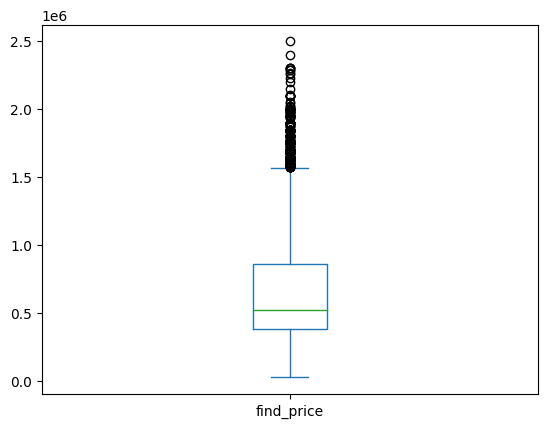

In [84]:
df_1['find_price'].plot.box()

<Axes: >

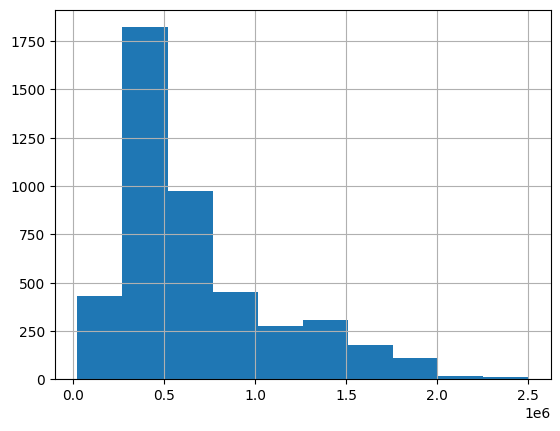

In [85]:
df_1['find_price'].hist()

In [86]:
from numpy import log10

df_1['log_find_price'] = log10(df_1['find_price'])

<Axes: >

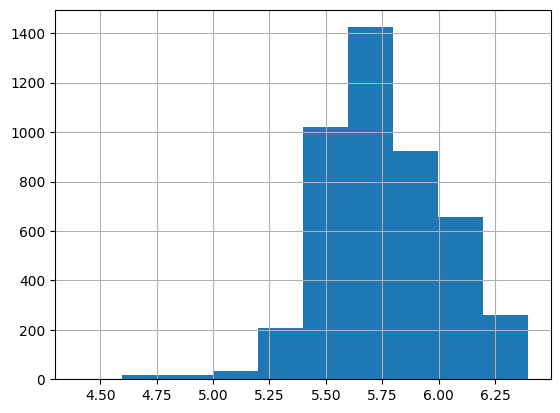

In [87]:
# sem melhoras significativas no shape da distribuição, vamos usar o find_price
df_1['log_find_price'].hist()

In [88]:
q1 = df_1['find_price'].quantile(q=0.25)
q3 = df_1['find_price'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)


476250.0


In [89]:
# aplicando metodo tukey
print(len(df_1))
df_1 = df_1[(df_1['find_price'] > (q1-1.5*iqr)) & (df_1['find_price'] < (q3+1.5*iqr))]
print(len(df_1))

4564
4297


### 2.4.2 bivariado

### 2.4.3 multivariado

# 3. Apresentar estatísticas descritivas dos dados com visualizações

# 4. Realizar teste de hipóteses para comparação de valores de categorias e visualizar diferenças